# Évaluation des modèles

Il existe de nombreux algorithmes de classification en Machine Learning:
https://scikit-learn.org/stable/user_guide.html


Avec Scikit-learn, le processus est toujours le même :
1. Créer un modèle en lui indiquant les paramètres souhaités. Dans le cas de la classification, la classe sera un classifier (dans l’exemple, il s’agit d’un TreeClassifier, c’est-à-dire un arbre de décision).
2. Faire l’apprentissage grâce à fit, en lui fournissant les données X et y d’apprentissage (il est possible d’utiliser de la validation croisée ou une optimisation des hyperparamètres (voir Modélisation et évaluation)
3. Prédire les résultats sur le dataset souhaité grâce à predict.
4. Appeler les différentes métriques souhaitées présentes dans sklearn.metrics avec en paramètres les résultats attendus et les données prédites.




In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

# Chargement du dataset Iris
iris_df = pd.read_csv('iris.csv')
y = iris_df['variety']
X = iris_df.drop(labels='variety', axis=1)

# Chargement des données
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Création d'un modèle
classifier = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit du modèle
classifier.fit(train_X, train_y)

# Prédiction
pred_y = classifier.predict(test_X)

# Evaluation
print(confusion_matrix(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
0.9777777777777777


In [2]:
iris_df.iloc[:, 4].nunique()


3

In [3]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Interprétation
Ce modèle apprend à prédire à quelle espèce appartient une fleur en se basant sur les mesures des sépales et des pétales:
Setosa (0)
Versicolor (1)
Virginica (2)

Lignes = Réalité (ce que la fleur est vraiment)
Colonnes = Prédiction du modèle
ex:
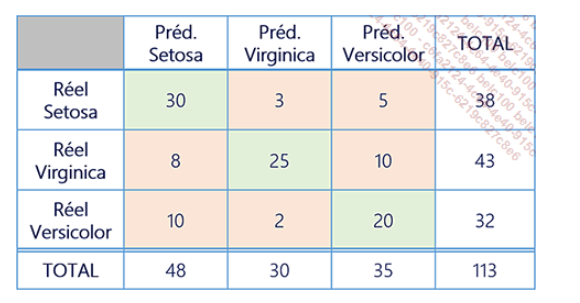

Comme on peut voir ici dans la **matrice de confusion**:
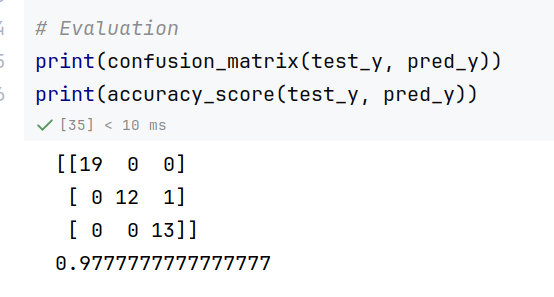

Le modèle a pu prédire:
19 fleurs réellement Setosa (0) -> toutes bien classées.
13 fleurs réellement Versicolor (1) -> 12 bien classées, 1 mal classée (Virginica).
13 fleurs réellement Virginica (2) -> toutes bien classées.

On a donc une précision de 44/45 ou 97.78%, ce qui est excellent



# DecisionTreeClassifier
L’arbre construit des règles du genre :
if PetalLength < 2.45:
    return Setosa
elif PetalWidth < 1.75:
    return Versicolor
else:
    return Virginica





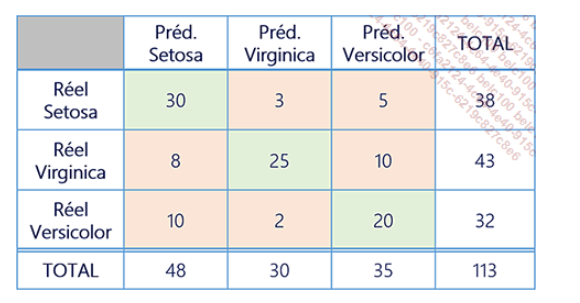

# Indicateurs dérivés de la matrice de confusion


Pour comparer deux modèles via leur matrice de confusion, les conventions suivantes seront utilisées :

VP : nombre de vrais positifs
VN : nombre de vrais négatifs
FP : nombre de faux positifs
FN : nombre de faux négatifs

Total : nombre total de cas (donc VP + VN + FP + FN)

## Accuracy
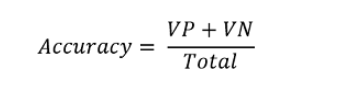

Avec Scikit-learn, la métrique à utiliser est **sklearn.metrics.accuracy_ score**

Il n’existe aucune règle sur la qualité d’un modèle par rapport à l’accuracy. Dans certains cas métiers, une accuracy de 60 % signifie de gros gains potentiels, par exemple lorsqu’il s’agit de garder des clients qui peuvent rapporter beaucoup de chiffre d’affaires. Dans d’autres, il faudra chercher une accuracy la plus proche possible des 100 %, comme pour une voiture autonome qui ne doit pas faire d’erreurs sur sa détection de piétons.

## Rappel et précision
Comme l’accuracy ne distingue pas le type des erreurs commises (type 1 FP ou type 2 FN), on utilise le **recall**  et la **précision**:
Le rappel est la proportion de la classe positive bien prédite (compris entre 0 et 1). Sa formule est :
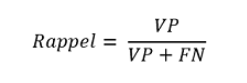

La précision est, elle, la proportion des vrais positifs dans l’ensemble des positifs détectés (aussi comprise entre 0 et 1). Sa formule est :
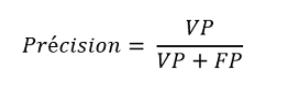

Pour un problème binaire, avec Scikit-learn, on utilise **recall_score** et **precision_score**.

Pour une classification multiclasse, il faut choisir la façon dont la moyenne sera faite sur chaque classe pour renvoyer une seule valeur (paramètre **average**).

Les possibilités sont :
**binary** : ne fonctionne que pour une classification binaire (recall_score et precision_score).
**micro** : calcule la métrique au niveau globale, en prenant le nombre total de faux positifs et faux négatifs.
**macro** : fait le calcul pour chaque classe puis effectue une moyenne arithmétique des valeurs.
**weighted** : la moyenne des indicateurs pour chaque classe est pondérée pour respecter l’importance relative des classes (une classe avec deux fois plus d’exemples aura donc un indicateur pondéré par 2).
**samples** : calcule les métriques pour chaque instance puis fait la moyenne. Ne s’applique que pour les classifications multilabels.


In [4]:
import sklearn

sklearn.metrics.recall_score(test_y, pred_y, average='macro')

0.9743589743589745

In [5]:
sklearn.metrics.precision_score(test_y, pred_y, average='macro')

0.9761904761904763

Pour avoir les rappels et précisions sur chaque classe, il est possible d’utiliser None comme choix de moyenne

In [6]:
sklearn.metrics.recall_score(test_y, pred_y, average=None)

array([1.        , 0.92307692, 1.        ])

In [7]:
sklearn.metrics.precision_score(test_y, pred_y, average=None)

array([1.        , 1.        , 0.92857143])

Il existe aussi la métrique classification_report pour obtenir un rapport contenant (entre autres) les deux indicateurs pour chaque classe ainsi que différentes moyennes de ces indicateurs pour le dataset complet :

À noter qu'on peut aussi utiliser precision_recall_fscore_support si on veut utiliser le tableau dans du code

In [8]:
# Recall et Precision en multi-classes
print(sklearn.metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## F1-score
Le F1 score est basé sur la précision et le recall, son but est de donner un unique indicateur qui prenne en compte le rappel et la précision, sans tomber dans les pièges de l’accuracy.

On dit que c'est la moyenne harmonique de la précision et du rappel.
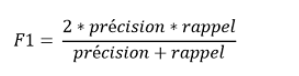

F1-score peut se calculer par classe ou sur l’ensemble des classes, selon s’il est calculé à partir des rappels et précisions de chaque classe ou pour l’ensemble du jeu de données.

Avec Scikit-learn, on utilise f1_score et on précise comment la moyenne est faite (comme les 2 précédents)

In [9]:
sklearn.metrics.f1_score(test_y, pred_y, average="macro")

0.974320987654321

Le score F1 est un cas particulier où rappel et précision ont **la même importance**.

Un score F2 (f beta) indique que le rappel a deux fois plus d’impact que la précision, ou, autrement dit, qu’une erreur de type II est deux fois plus coûteuse qu’une erreur de type I.
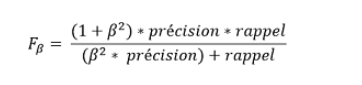

In [10]:
sklearn.metrics.fbeta_score(test_y, pred_y, beta=2, average="macro")

0.9741161616161617

## Sensibilité et spécificité
La sensibilité et la spécificité sont aussi appelées « valeur prédictive positive » et « valeur prédictive négative ».

Pratiquement toujours utilisé pour des classifications binaires en medecine.

La **sensibilité** évalue la capacité du modèle à prédire la classe positive quand c’est effectivement le cas. Il permet donc, en médecine, de s’assurer qu’un maximum de malades sera détecté. Elle n’est donc évaluée que sur la population réellement positive (ou malade).
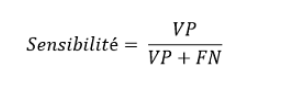

La **spécificité** est son contraire, elle donne la capacité du modèle à donner un résultat négatif pour la classe négative. Elle permet de s’assurer, en médecine, que des malades ne seront pas détectés par erreur parmi la population saine.
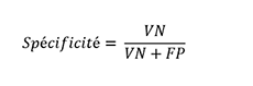

Scikit-learn n’a pas de méthode direct pour ces indicateurs, mais on peut utiliser le recall sur la classe positive et négative, ce qui revient au même.

# La courbe ROC et l’AUC

ROC (Receiver Operating Charasteristic)
AUC (Area Under Curve)

## Prédiction et probabilité
1. Avec Scikit-learn, la méthode **predict** renvoie uniquement la prédiction pour chaque donnée.
2. **predict_proba** renvoie non plus la classe, mais les probabilités pour chaque classe :

avec les probabilités, on peut comprendre la confiance du modèle dans ses prédictions et faire une interprétation fine.

In [11]:
pred_y_prob = classifier.predict_proba(test_X)
print(pred_y_prob)

[[0.         0.96969697 0.03030303]
 [1.         0.         0.        ]
 [0.         0.12195122 0.87804878]
 [0.         0.96969697 0.03030303]
 [0.         0.12195122 0.87804878]
 [1.         0.         0.        ]
 [0.         0.96969697 0.03030303]
 [0.         0.12195122 0.87804878]
 [0.         0.96969697 0.03030303]
 [0.         0.96969697 0.03030303]
 [0.         0.12195122 0.87804878]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.96969697 0.03030303]
 [0.         0.12195122 0.87804878]
 [0.         0.96969697 0.03030303]
 [0.         0.96969697 0.03030303]
 [0.         0.12195122 0.87804878]
 [1.         0.         0.        ]
 [0.         0.12195122 0.87804878]
 [1.         0.         0.        ]
 [0.         0.12195122 0.87804878]
 [0.         0.12195122 0.87804878]
 [0.         0.12195122 0.87804878]
 [0.         0.12195122 0.87804878]
 [0.         0.12195122 0.87

## Taux de vrais et faux positifs
Deux indicateurs sont utilisés pour tracer la courbe ROC :
1. Le taux de vrais positifs (TVP)
2. Le taux de faux positifs (TFP)

## Courbe ROC
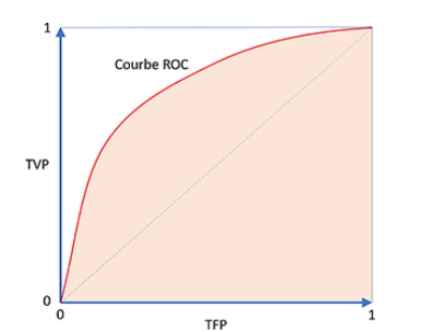

quand la courbe est bien au-dessus de la diagonale == mieux que le hasard. Dans ce cas-si- on peut voir que le modèle est bon car haut TPR avec un faible FPR. Idéalement, la zone sous la courbe se rapproche de 1.


La courbe ROC est utile pour comparer deux modèle, il est facile de déterminer le meilleur.

On peut utiliser la fonction **roc_curve** pour obtenir différents points de la courbe avec la limite utilisée.
La fonction **plot_roc_curve** permet d’obtenir un graphique de la courbe ROC.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

titanic_df = pd.read_csv("titanic.csv")

# Création des nouvelles colonnes
titanic_df['FamilyNb'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Alone'] = (titanic_df['FamilyNb'] == 0)

# transformes les colonnes Sex et Embarked (qui sont catégorielles) en variables numériques binaires
sex_df = pd.get_dummies(titanic_df['Sex'], prefix='sex', drop_first=True) #drop_first pour éviter de créer deux colonnes
embarked_df = pd.get_dummies(titanic_df['Embarked'], prefix='embarked', dummy_na=True) # Créer une colonne par catégorie
titanic_df = pd.concat([titanic_df, embarked_df, sex_df], axis=1)

# Suppression des colonnes non utilisées
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin',
'SibSp', 'Parch', 'Sex', 'Embarked'], axis=1, inplace=True) # inplace remplace le df original

# Séparation train-test
y = titanic_df['Survived']
X = titanic_df.drop(['Survived'], axis=1)
train_X_titanic, test_X_titanic, train_y_titanic, test_y_titanic = (train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42))

# Imputation des données manquantes
col_names = train_X_titanic.columns
titanic_imputer = SimpleImputer(strategy='mean')
titanic_imputer.fit(train_X_titanic)
train_X_titanic = titanic_imputer.transform(train_X_titanic)
test_X_titanic = titanic_imputer.transform(test_X_titanic)

# /!\ : En raison du passage par Scikit, les datasets sont maintenant des numpy.array et non des DataFrame Pandas !
# Il faut recréer les DataFrame pour garder les noms des colonnes
train_X_titanic = pd.DataFrame(data=train_X_titanic, columns=col_names)
test_X_titanic = pd.DataFrame(data=test_X_titanic, columns=col_names)



classifier_titanic = DecisionTreeClassifier(max_depth=2,
random_state=42)
classifier_titanic.fit(train_X_titanic, train_y_titanic)
pred_y_titanic_prob = classifier_titanic.predict_proba(test_X_titanic)
pred_y_titanic = classifier_titanic.predict(test_X_titanic)


In [13]:
sklearn.metrics.roc_curve(test_y_titanic, pred_y_titanic_prob[:,1])

(array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))

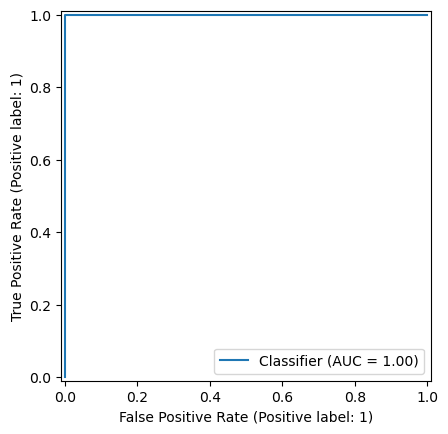

In [16]:
sklearn.metrics.RocCurveDisplay.from_predictions(test_y_titanic, pred_y_titanic_prob[:,1])

# ***ERREUR***
# Aucune courbe ROC affiché (AUC 1?) Il va falloir trouver le problème